In [27]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./data/city_data.csv"
ride_data_to_load = "./data/ride_data.csv"

# Read the City and Ride Data
cd = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)
#check DF
cd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [28]:
rd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


## Bubble Plot of Ride Sharing Data

In [29]:
# Combine the data into a single dataset
crd = pd.merge(cd,rd,on="city")
# Display the data table for preview
crd.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [30]:
# Obtain the x and y coordinates for each of the three city types
#Calculations for each city type - generate series for average fare, total rides and total drivers 
#avg_fare
group_city = crd.groupby("city")
avg_fare = group_city.mean()["fare"]
#total_rides
total_rides = group_city.count()["ride_id"]
#total_drivers
total_drivers = group_city.count()["driver_count"]
#set city as index in the cd(city data) set for the city type 
new_city = cd.set_index("city")["type"]
#check the different values of the cd_new set by value_counts
#new_city.value_counts()
#Create DF for all the above 3 along with the city type
final_df = pd.DataFrame({"Average Fare":avg_fare,"Total Rides":total_rides,"Total Drivers":total_drivers,"City Type":new_city})
final_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,18,Urban
Barajasview,25.332273,22,22,Urban
Barronchester,36.422500,16,16,Suburban
Bethanyland,32.956111,18,18,Suburban
Bradshawfurt,40.064000,10,10,Rural


In [31]:
# for each city type- urban, suburban and rural
uc = final_df.loc[final_df["City Type"]=="Urban"]
#uc
suc = final_df.loc[final_df["City Type"]=="Suburban"]
#suc
rc = final_df.loc[final_df["City Type"]=="Rural"]
#rc

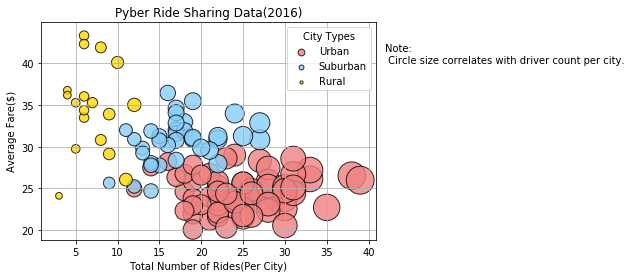

In [32]:
plt.scatter(uc["Total Rides"],uc["Average Fare"],s = uc["Total Drivers"]*20, marker="o",color ="LightCoral", edgecolors="black", alpha =0.8, label = "Urban")
plt.scatter(suc["Total Rides"],suc["Average Fare"],s = suc["Total Drivers"]*15, marker="o",color ="LightSkyBlue", edgecolors="black", alpha =0.8, label = "Suburban")
plt.scatter(rc["Total Rides"],rc["Average Fare"],s = rc["Total Drivers"]*15, marker="o",color ="Gold", edgecolors="black",alpha =0.8, label = "Rural")
plt.grid()
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.legend(title="City Types", loc = "upper right", markerscale=0.3)
#DO NOT USE plt.Text, use only plt.text
plt.text(42,40,"Note:\n Circle size correlates with driver count per city.")
#plt.text(>x_axis_max,=y_axis,"text")

#Save fig
plt.savefig("./Images_solution/Pyber_Ride_Sharing_Data.png")
plt.show()

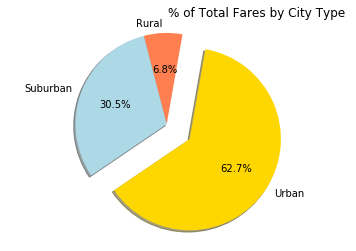

In [33]:
#Total Fares by City Type
# Calculate Fare Percents
group_fares = crd.groupby("type")
total_fares = group_fares.sum()["fare"]
total_fares
explode=[0,0,0.3]
total_fares.index
# labels=["Urban","Suburban","Rural"]
# Build Pie Chart
#plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, 
#         shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, 
#         wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)

plt.pie(total_fares,explode=explode,labels=total_fares.index,colors=["coral","lightblue","gold"], 
        shadow=True,startangle= 80,autopct = "%1.1f%%")
plt.title("% of Total Fares by City Type",loc="right")
plt.axis("equal")
# Save Figure
plt.savefig("./Images_solution/Fares_CityType.png")
plt.show()

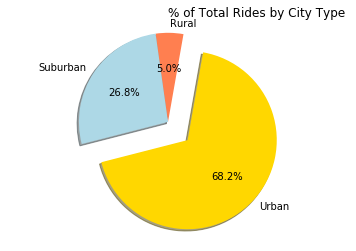

In [34]:
# Total rides by City Type
#Calculate rides percent
group_rides = crd.groupby("type")
total_rides = group_rides.sum()["ride_id"]
total_rides
explode=[0,0,0.3]

# Build Pie Chart
#plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, 
#         shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, 
#         wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)

plt.pie(total_rides,explode=explode,labels=["Rural","Suburban","Urban"],colors=["coral","lightblue","gold"], 
        shadow=True,startangle= 80,autopct = "%1.1f%%")
plt.title("% of Total Rides by City Type",loc="right")
plt.axis("equal")
# Save Figure
plt.savefig("./Images_solution/Rides_CityType.png")
plt.show()

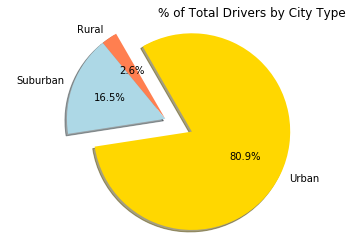

In [35]:
# Total Drivers by City Type
# Calculate Driver Percents
#consider the city DF here instead of the merged DF to avoid duplicate driver counts
group_drivers = cd.groupby("type")
total_drivers = group_drivers.sum()["driver_count"]
total_drivers
explode=[0,0,0.3]

# Build Pie Chart
#plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, 
#         shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, 
#         wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)

plt.pie(total_drivers,explode=explode,labels=["Rural","Suburban","Urban"],colors=["coral","lightblue","gold"], 
        shadow=True,startangle= 120,autopct = "%1.1f%%")
plt.title("% of Total Drivers by City Type",loc="right")
plt.axis("equal")
# Save Figure
plt.savefig("./Images_solution/Drivers_CityType.png")
plt.show()